In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
class scenario:
    
    def __init__(self, A, N, SIR0, R0 = 2.2,T = 5.1, labels = None):
        self.A = np.array(A).astype("double")
        self.A0 = A
        self.Asum = np.sum(A,axis = 1)
        self.N = np.array(N).astype("double")
        self.Ninv = np.reciprocal(self.N)
        self.R = R0
        self.T = T
        self.beta = np.array([R0/T]*len(N))
        self.gamma = np.array([1/T]*len(N))
        self.labels = labels
        if labels != None:
            self.num = dict(zip(labels, range(len(labels))))
        self.SIR = [SIR0]
        
    def dSIR(self, SIR_snap):
        S,I,R = SIR_snap[0],SIR_snap[1],SIR_snap[2]
        
        def quant(X):
            return np.dot(self.A,X*self.Ninv) - self.Asum*X*self.Ninv
        
        dS = -self.beta*I*S*self.Ninv + quant(S)
        dI = self.beta*I*S*self.Ninv - self.gamma*I + quant(I)
        dR = self.gamma*I + quant(R)
        return np.array([dS,dI,dR])
        
    def march(self, nt):
        SIR = np.zeros((nt,3,self.A.shape[0]))
        SIR[0] = self.SIR[-1]
        
        for i in range(1,nt):
            SIR[i] = SIR[i-1]+self.dSIR(SIR[i-1])
        
        self.SIR += SIR.tolist()[1:]
        return SIR
        
    def plot(self, value, as_percent = False):
        plt.figure(figsize=(16,10))
        for country in range(len(self.N)):
            s = np.array(self.SIR)[:,value,country]
            if as_percent:
                s = s*self.Ninv[country]
            plt.plot(range(len(s)),s)
        if self.labels != None:
            plt.legend(self.labels)
        plt.show()
    
    def update_R(self, pairs):
        for (i,r) in pairs:
            self.beta[self.num[i]] = r*self.gamma[self.num[i]]
            
    def borders(self, pairs):
        for (c,b) in pairs:
            if b:
                self.A[self.num[c]] = self.A0[self.num[c]]
            else:
                self.A[self.num[c]] = np.zeros_like(self.A[self.num[c]])
            

def europe():
    Labels = ['BE','BG','CZ','DK','DE','EE','IE','EL','ES','FR','HR','IT',
      'CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','UK','NO','CH']
    N = [11590,6948,10709,5792,83784,1327,4938,10427,46755,65274,4105,60462,1170,1886,2722,
                         626,9660,442,17135,9006,37847,10197,19238,2078,5460,5541,10099,67886,5421,8655]
    num = dict(zip(Labels, range(len(Labels))))
    pop = dict(zip(Labels,N))
    A = pd.read_csv("thematrix.csv" , header = None).to_numpy()/(365*1000)
    SIR0 = np.array([N]+[[0]*len(N)]*2)
    inf = 100
    SIR0[:,num['IT']] = [N[num['IT']]-inf,inf,0]

    cs = scenario(A,N,SIR0,labels = Labels)
    cs.march(10)
    cs.borders([('DE',False)])
    cs.march(70)
    cs.plot(1, as_percent = True)

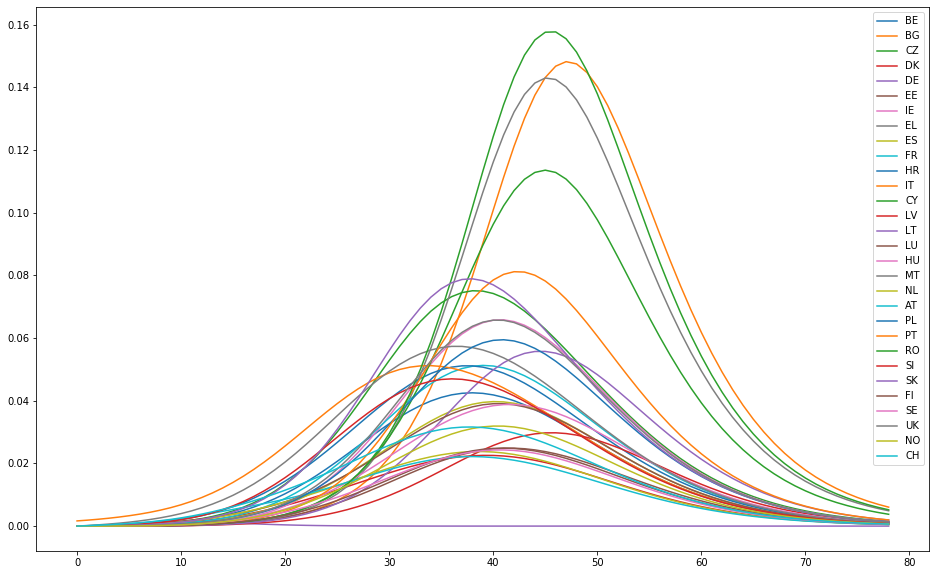

In [40]:
europe()

In [4]:
a = np.array([[1,2,3]])
np.concatenate((a,[[4,5]]), axis = 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 2